In [45]:
import pandas as pd
from joblib import Parallel, delayed
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
import time
import swifter # For Parallel computing and use MultiThread 
import fastcluster
from scipy.cluster.hierarchy import dendrogram, linkage

from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [6]:
df=pd.read_csv("C:/Users/pctes/Downloads/DANA_PROJECTS/DANA_4840/data_2.csv")
df_labels=pd.read_csv("C:/Users/pctes/Downloads/DANA_PROJECTS/DANA_4840/labels.csv")

In [62]:
df.tail()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000
800,sample_800,0.0,2.325242,3.805932,6.530246,9.560367,0.0,7.957027,0.000000,0.0,...,6.403075,8.594354,10.243079,9.139459,10.102934,11.641081,10.607358,9.844794,4.550716,0.000000


In [3]:
df_labels.tail()

NameError: name 'df_labels' is not defined

In [70]:
# Let's check if both labels have the same names 
list_labels=df_labels.iloc[:,0].tolist()
list_df=df.iloc[:,0].tolist()
print((list_labels)==(list_df))

True


In [7]:
# Class column was sent to the end of the columns 
df_merged=df.merge(df_labels,on="Unnamed: 0",how="left")


In [8]:
column_list_df=df.columns.tolist()

In [9]:
# Now we are moving Class column to the first position 
df_merged=df_merged[["Class"] + column_list_df]

In [7]:
df_merged.head()

,Class,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [12]:
# We are dropping the Unnamed column
df_merged.drop(columns=["Unnamed: 0"],inplace=True)

In [14]:
# Save merged:file

df_merged.to_csv("df_merged.csv",index=False)

In [13]:
df_merged.head()

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [8]:
# Exploratory Data Analysis

df_merged_copy=df_merged.copy()


In [9]:
df_merged["Class"].unique()
# Labels  5 classes: BRCA, KIRC, COAD, LUAD, and PRAD




array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

#### PRAD: PRAD stands for Prostate Adenocarcinoma. It refers to cancers that arise in the prostate gland.
#### LUAD: LUAD stands for Lung Adenocarcinoma. It refers to cancers that arise in the lung tissue.
#### BRCA: BRCA stands for Breast Cancer. Specifically, it refers to cancers that arise in breast tissue.
#### KIRC: KIRC stands for Kidney Renal Clear Cell Carcinoma. 
#### COAD: COAD stands for Colon Adenocarcinoma. It refers to cancers that arise in the colon.




In [58]:
#  Beginning of Exploratory Data Analysis
# There is only one Object Column ,the rest are numerical values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [2]:
df_merged=pd.read_csv("df_merged.csv")

In [3]:
df_merged.head()

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


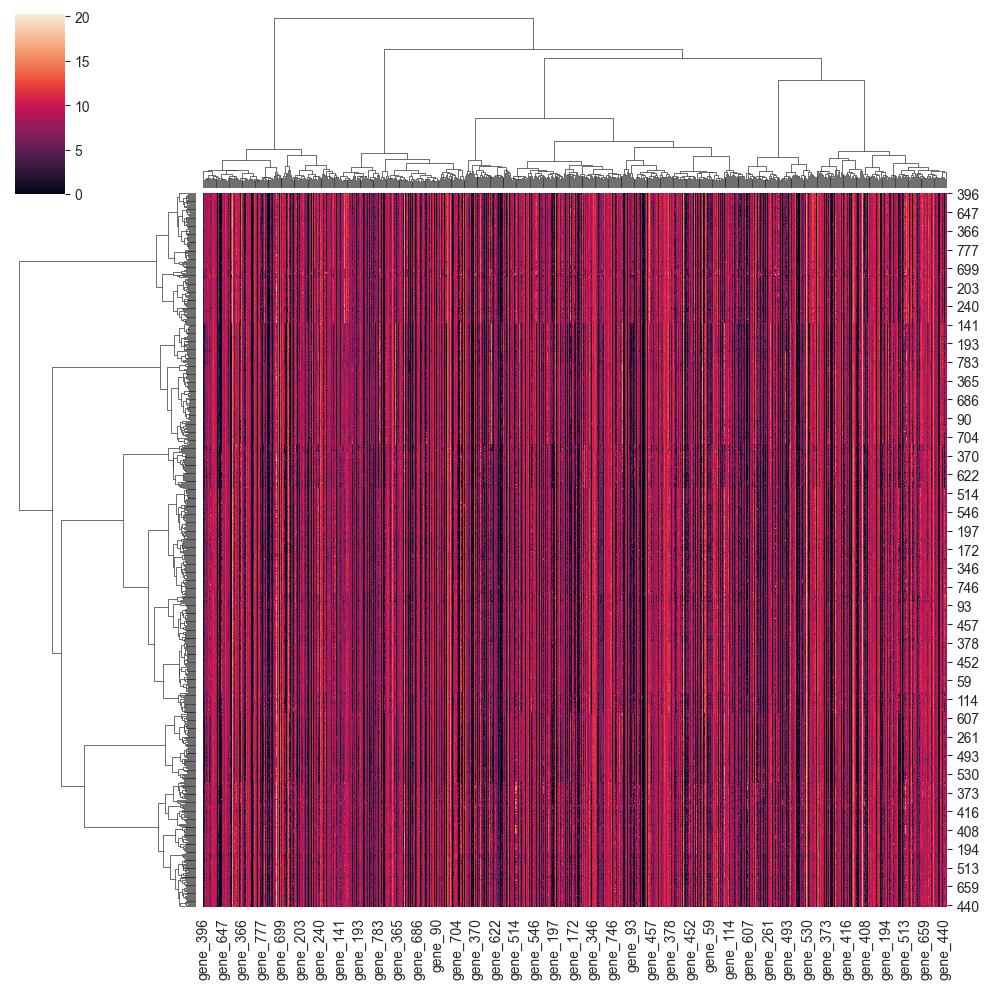

In [24]:

genes= df_merged.columns[1:]
labels= df_merged["Class"]

# Perform hierarchical clustering
Z = fastcluster.linkage_vector(df_merged[genes], method='ward', metric='euclidean')

# Plot the dendrogram
sns.clustermap(df_merged[genes], method='ward', metric='euclidean', figsize=(10, 10),col_linkage=Z,row_linkage=Z);

# helps in understanding how samples (rows) or features (columns) cluster together based on their similarity in gene expression profiles.

In [25]:
df_merged_copy=df_merged.copy()

In [47]:
df_merged.head(10)

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0
5,PRAD,0.0,3.467853,3.581918,6.620243,9.706829,0.0,7.758510,0.000000,0.0,...,5.726657,8.602588,9.928339,6.096154,9.816001,11.556995,9.244150,9.836473,5.355133,0.0
6,KIRC,0.0,1.224966,1.691177,6.572007,9.640511,0.0,6.754888,0.531868,0.0,...,5.105904,7.927968,9.673966,1.877744,9.802692,13.256060,9.664486,9.244219,8.330912,0.0
7,PRAD,0.0,2.854853,1.750478,7.226720,9.758691,0.0,5.952103,0.000000,0.0,...,5.297833,8.277092,9.599230,5.244290,9.994339,12.670377,9.987733,9.216872,6.551490,0.0
8,BRCA,0.0,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,0.0,...,6.721974,9.597533,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321,0.0
9,PRAD,0.0,3.642494,4.423558,6.849511,9.464466,0.0,7.947216,0.724214,0.0,...,6.020051,8.712809,10.259096,6.131583,9.923582,11.144295,9.244851,9.484299,4.759151,0.0


In [80]:
# We are going to transform using np2.log  based on  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6894875/
# Then Identify the genes that show no variation ,meaning the first quantile is the same as the third quantile
# Lastly ,remove the genes that were expressed very low 
# to the  dataset and then compare if the firs quantile is equal to the third quantile to show the genes that show no variation 

# If any value is zero, the result will be negative infinity (-inf)
df_merged_log = np.log2(df_merged.iloc[:, 1:] + 1)

# Identify genes with zero standard deviation
genes_to_remove_std = df_merged_log.columns[df_merged_log.std() == 0]

# Identify the genes quantiles 0.25 and 0.75
gene_quantiles = df_merged_log.quantile([0.25, 0.75], axis=0)

# Comparae where the first quantile is equal to the third quantile
genes_to_remove_quantile = gene_quantiles.columns[(gene_quantiles.loc[0.25] == gene_quantiles.loc[0.75]).values]

#genes to remove
genes_to_remove= np.union1d(genes_to_remove_std, genes_to_remove_quantile)

# Optionally, you can remove the identified genes from the DataFrame
filtered_df = df_merged_log.drop(columns=genes_to_remove)

# Display the resulting DataFrame or do further analysis
print(filtered_df)

       gene_1    gene_2    gene_3    gene_4    gene_6    gene_7   gene_10  \
0    1.593215  2.092724  2.695657  3.515006  3.031250  0.670723  0.670723   
1    0.671504  1.372072  3.102013  3.409121  2.966440  0.000000  0.000000   
2    2.173690  2.413377  2.978523  3.442377  2.994965  0.538633  0.000000   
3    2.221450  2.461437  2.937169  3.484935  3.144597  0.520932  0.000000   
4    1.870164  1.934157  2.914460  3.424689  2.919715  0.444648  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
796  1.518858  1.894603  3.061793  3.460219  2.956947  0.581999  0.000000   
797  2.305374  2.447264  2.877076  3.466871  3.056641  0.000000  0.000000   
798  2.087321  2.234959  3.199421  3.392878  3.093660  1.491135  3.078635   
799  1.844120  1.921427  3.056345  3.457743  3.352400  0.000000  1.366669   
800  1.733460  2.264816  2.912697  3.400588  3.163020  0.000000  0.806015   

      gene_11   gene_12   gene_13  ...  gene_20520  gene_20521  gene_20522 

In [91]:


print("The number of genes that show no variation are and standard deviation is zero are :",len(genes_to_remove_quantile))
print("The number of genes that show no variation are and standard deviation is zero are :",len(genes_to_remove_std))

The number of genes that show no variation are and standard deviation is zero are : 1927
The number of genes that show no variation are and standard deviation is zero are : 267


In [101]:
# Replace the index from filtered df with the index of df_merged  with the column class to put as index in filtered df

#Replace first column from filtered df

filtered_df.index=df_merged.iloc[:,0]
filtered_df.head()

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529
Class,,,,,,,,,,,,,,,,,,,,,
PRAD,1.593215,2.092724,2.695657,3.515006,3.031250,0.670723,0.670723,1.222979,1.592345,0.670723,...,3.036545,2.567232,3.203241,3.422706,3.039144,3.339111,3.700788,3.412882,3.310533,2.652317
LUAD,0.671504,1.372072,3.102013,3.409121,2.966440,0.000000,0.000000,0.667070,1.793522,1.003166,...,3.540927,2.483718,3.057254,3.425047,2.859291,3.229836,3.773422,3.525700,3.378214,1.629552
PRAD,2.173690,2.413377,2.978523,3.442377,2.994965,0.538633,0.000000,0.538633,1.575855,1.052529,...,3.502843,2.614760,3.190160,3.573937,2.678434,3.447790,3.328442,3.431404,3.471249,1.423859
PRAD,2.221450,2.461437,2.937169,3.484935,3.144597,0.520932,0.000000,0.520932,1.953916,0.000000,...,3.349765,2.823049,3.291745,3.477874,3.313653,3.406157,3.631417,3.418839,3.417429,2.101651
BRCA,1.870164,1.934157,2.914460,3.424689,2.919715,0.444648,0.000000,1.186400,1.651318,0.000000,...,3.364401,2.806537,3.306178,3.507641,3.032306,3.439212,3.691807,3.353006,3.386975,2.611260


In [166]:
# Let's pivot the table to perform anova test across the classes and see if the mean is different across the cancer classes
from scipy.stats import f_oneway
#I will keep the same order as the filtered df prior to pivoting 

# I will pivot the table to perform anova test across the classes and see if the mean is different across the cancer classes


column_order=filtered_df.columns.tolist()
df_pivot=pd.pivot_table(filtered_df,index=["Class"],aggfunc="mean")
df_pivot=df_pivot[column_order]
df_transposed=df_pivot.T

# Perform anova test across the classes

df_transposed.head()

Class,BRCA,COAD,KIRC,LUAD,PRAD
gene_1,1.847820,2.108424,1.663586,2.042930,2.094716
gene_2,1.872729,2.049084,1.743961,2.104027,2.286778
gene_3,2.939276,3.140408,2.873718,2.927850,2.935317
gene_4,3.458503,3.449789,3.383500,3.428851,3.425741
gene_6,3.076827,3.045162,2.979143,3.037290,3.132025


In [167]:
df_pivot

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,1.847820,1.872729,2.939276,3.458503,3.076827,0.515909,0.407578,0.893145,1.835442,0.359666,...,3.371877,2.776241,3.319013,3.470472,2.807050,3.421405,3.670195,3.475218,3.426760,2.778028
COAD,2.108424,2.049084,3.140408,3.449789,3.045162,0.510220,0.224700,0.892929,1.795554,0.043793,...,3.473916,2.684466,3.273164,3.454436,0.641761,3.338476,3.722953,3.495776,3.370917,2.120338
KIRC,1.663586,1.743961,2.873718,3.383500,2.979143,0.618819,0.935092,0.688561,1.830401,0.252172,...,3.128147,2.887279,3.257365,3.463557,1.933004,3.467681,3.677357,3.484487,3.381815,2.565022
LUAD,2.042930,2.104027,2.927850,3.428851,3.037290,0.418116,0.511619,0.981741,1.829497,0.366925,...,3.317963,2.706140,3.250779,3.453629,2.395203,3.415106,3.674890,3.451111,3.375995,2.561285
PRAD,2.094716,2.286778,2.935317,3.425741,3.132025,0.461875,0.724062,0.719317,1.927244,0.217852,...,3.082099,2.785847,3.281871,3.477844,2.763521,3.437493,3.623462,3.492737,3.417992,2.734429


In [168]:
# Perform anova test across the classes
# We are going to perform anova test to see if the mean is different across the classes

# THIS IS WHERE I AM HAVING TROUBLE 

anova_results = {}

# Loop through each gene
for cancer in df_transposed.columns:
    # Separate gene expression data for each class
    class_data = [df_transposed.loc[cancer, gene] for gene in df_transposed.index]

    # Perform ANOVA for the gene
    f_stat, p_value = f_oneway(*class_data)
    # Store results only if p-value < 0.05 (i.e., Reject H0)
    if p_value < 0.05:
        anova_results[cancer] = {'F-statistic': f_stat, 'p-value': p_value}



    

KeyError: 'gene_1'

In [171]:
#df_transposed.loc["gene_1","BRCA"]
datos=[num for num in df_transposed.index]

In [172]:
datos[0:10]

['gene_1',
 'gene_2',
 'gene_3',
 'gene_4',
 'gene_6',
 'gene_7',
 'gene_10',
 'gene_11',
 'gene_12',
 'gene_13']

In [141]:
counter=3
for x in df_transposed.index:
    print(x)
    counter -= 1
    if counter == 0:
        break
        
# so it is retrivieng the data for somehowe it is not passing to the dictionary

gene_1
gene_10
gene_100


In [125]:
counter=2 # Only print the 10.items

for gene, results in df_transposed.items():
    print(f"Gene: {gene}")
    print(f"Results: {results}")
    counter -= 1
    if counter == 0:
        break

Gene: BRCA
Results: gene_1        1.847820
gene_10       0.407578
gene_100      3.544179
gene_1000     3.497580
gene_10000    2.004110
                ...   
gene_9993     1.670001
gene_9994     1.342206
gene_9995     1.737469
gene_9997     1.414277
gene_9999     2.985119
Name: BRCA, Length: 18604, dtype: float64
Gene: COAD
Results: gene_1        2.108424
gene_10       0.224700
gene_100      3.586341
gene_1000     3.452284
gene_10000    2.048825
                ...   
gene_9993     1.335120
gene_9994     2.222462
gene_9995     1.698134
gene_9997     1.534806
gene_9999     2.919434
Name: COAD, Length: 18604, dtype: float64


In [90]:
"""
# Calculate the 15th percentile for each gene to remove the genes that were expressed very low varitation 
gene_15th_percentile = filtered_df.apply(lambda x: np.percentile(x, 15), axis=0)

# Identify genes where expression values are consistently below the 15th percentile
low_expression_genes = gene_15th_percentile.index[(filtered_df < gene_15th_percentile).all()]

# Get the expression values for the low expression genes
low_expression_values = filtered_df[low_expression_genes]

"""

# I tried several hours but I couldnt do it 


'\n# Calculate the 15th percentile for each gene to remove the genes that were expressed very low varitation \ngene_15th_percentile = filtered_df.apply(lambda x: np.percentile(x, 15), axis=0)\n\n# Identify genes where expression values are consistently below the 15th percentile\nlow_expression_genes = gene_15th_percentile.index[(filtered_df < gene_15th_percentile).all()]\n\n# Get the expression values for the low expression genes\nlow_expression_values = filtered_df[low_expression_genes]\n\n'

In [85]:
filtered_df

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529
0,1.593215,2.092724,2.695657,3.515006,3.031250,0.670723,0.670723,1.222979,1.592345,0.670723,...,3.036545,2.567232,3.203241,3.422706,3.039144,3.339111,3.700788,3.412882,3.310533,2.652317
1,0.671504,1.372072,3.102013,3.409121,2.966440,0.000000,0.000000,0.667070,1.793522,1.003166,...,3.540927,2.483718,3.057254,3.425047,2.859291,3.229836,3.773422,3.525700,3.378214,1.629552
2,2.173690,2.413377,2.978523,3.442377,2.994965,0.538633,0.000000,0.538633,1.575855,1.052529,...,3.502843,2.614760,3.190160,3.573937,2.678434,3.447790,3.328442,3.431404,3.471249,1.423859
3,2.221450,2.461437,2.937169,3.484935,3.144597,0.520932,0.000000,0.520932,1.953916,0.000000,...,3.349765,2.823049,3.291745,3.477874,3.313653,3.406157,3.631417,3.418839,3.417429,2.101651
4,1.870164,1.934157,2.914460,3.424689,2.919715,0.444648,0.000000,1.186400,1.651318,0.000000,...,3.364401,2.806537,3.306178,3.507641,3.032306,3.439212,3.691807,3.353006,3.386975,2.611260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1.518858,1.894603,3.061793,3.460219,2.956947,0.581999,0.000000,0.000000,2.113941,0.000000,...,3.156845,2.825406,3.338897,3.460068,2.455338,3.407992,3.703905,3.434703,3.471548,3.295616
797,2.305374,2.447264,2.877076,3.466871,3.056641,0.000000,0.000000,1.035119,1.874290,0.000000,...,3.331545,2.882032,3.409165,3.436151,2.917494,3.331132,3.659174,3.500454,3.284808,3.414011
798,2.087321,2.234959,3.199421,3.392878,3.093660,1.491135,3.078635,2.336088,2.158401,0.666023,...,3.454865,2.748329,3.264642,3.521744,2.198420,3.371648,3.720382,3.546116,3.387736,2.505245
799,1.844120,1.921427,3.056345,3.457743,3.352400,0.000000,1.366669,1.485789,2.212649,0.000000,...,3.003357,2.762399,3.263844,3.585525,2.522530,3.409579,3.608606,3.502778,3.511035,2.748193


(801, 20265)

In [ ]:



# Assuming df_merged is your DataFrame containing gene expression data

# Perform log2 transformation with addition of 1
df_merged_log = np.log2(df_merged.iloc[:, 1:] + 1)

# Calculate the 1st and 3rd quantiles for each gene
gene_quantiles = df_merged_log.quantile([0.25, 0.75], axis=0)

# Identify genes where the 1st quantile is equal to the 3rd quantile that show no variation
genes_to_remove_quantile = gene_quantiles.columns[(gene_quantiles.loc[0.25] == gene_quantiles.loc[0.75]).values]

# Calculate the 15th percentile for each gene
gene_15th_percentile = df_merged_log.apply(lambda x: np.percentile(x, 15), axis=0)

# Identify genes where expression values are consistently below the 15th percentile
low_expression_genes = gene_15th_percentile.index[df_merged_log.apply(lambda x: (x < gene_15th_percentile).sum() / len(x) >= 0.75)]

# Combine both lists of genes to remove
genes_to_remove = np.union1d(np.union1d(genes_to_remove_std, genes_to_remove_quantile), low_expression_genes)

# Remove identified genes from the DataFrame
filter_df = df_merged_log.drop(columns=genes_to_remove)

# Display the resulting DataFrame
display(filter_df)


In [ ]:
## # If you need to revert back to the original scale, subtract 1
## df_merged_original_scale = np.power(2, df_merged_log) - 1

In [11]:
# Let's see the distribution of the data across CLASS columns
df_merged.groupby("Class").size()

# Anova 800 y 5 clases  si el mean es diferente de las 4 clases  Feature Expression methods
# Despues hacemos PCA , ver cuantos Eigen values  100 es mucho 10 esta Bien , no hagas random seed 
# hacemos PCA  despues de anova test 

Class
BRCA    300
COAD     78
KIRC    146
LUAD    141
PRAD    136
dtype: int64

In [92]:
# I am going to group  them based on their class and plot an histogram to see the distribution of the data
df_merged.head(3)


,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0


In [41]:
df_pivot=pd.pivot_table(df_merged,index=["Class"],aggfunc="mean")
df_pivot

# STATISTICAL DIFFERENCE ACROSS THE GENES 

# We are comparing the mean of all genes acros the classes to plot and compare any discrepancy 

,gene_0,gene_1,gene_10,gene_100,gene_1000,gene_10000,gene_10001,gene_10002,gene_10003,gene_10004,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,0.011362,2.839739,0.544066,10.681488,10.303568,3.258028,7.339461,7.900497,7.489146,7.508378,...,1.969278,5.142237,1.736160,2.312551,1.696127,2.493789,0.046527,2.099709,0.151063,6.954733
COAD,0.022212,3.438381,0.357278,11.015745,9.951124,3.462039,5.526673,7.487396,3.783493,6.959238,...,2.216178,0.354828,1.833606,1.619692,3.839205,2.396207,0.090327,2.298246,0.065007,6.618466
KIRC,0.046544,2.398129,1.166824,10.238999,11.148094,1.651798,6.895752,7.686932,7.269611,7.636246,...,1.824964,0.596508,2.393303,1.872888,1.289448,3.139623,0.130416,2.387948,0.148641,6.429343
LUAD,0.041088,3.358260,0.607541,10.517670,10.503698,3.754181,7.281878,7.041924,6.145042,7.148682,...,2.609490,2.801700,2.738326,1.869805,2.217144,2.459608,0.042070,2.281828,0.056608,6.721517
PRAD,0.026544,3.441041,0.765608,10.282936,9.967433,1.949878,7.946141,8.529695,5.696368,7.396572,...,1.623491,4.594215,1.684084,2.588050,1.703772,3.568490,0.572893,3.621548,0.094953,7.104225


In [87]:
df_square_root=df_pivot.copy()

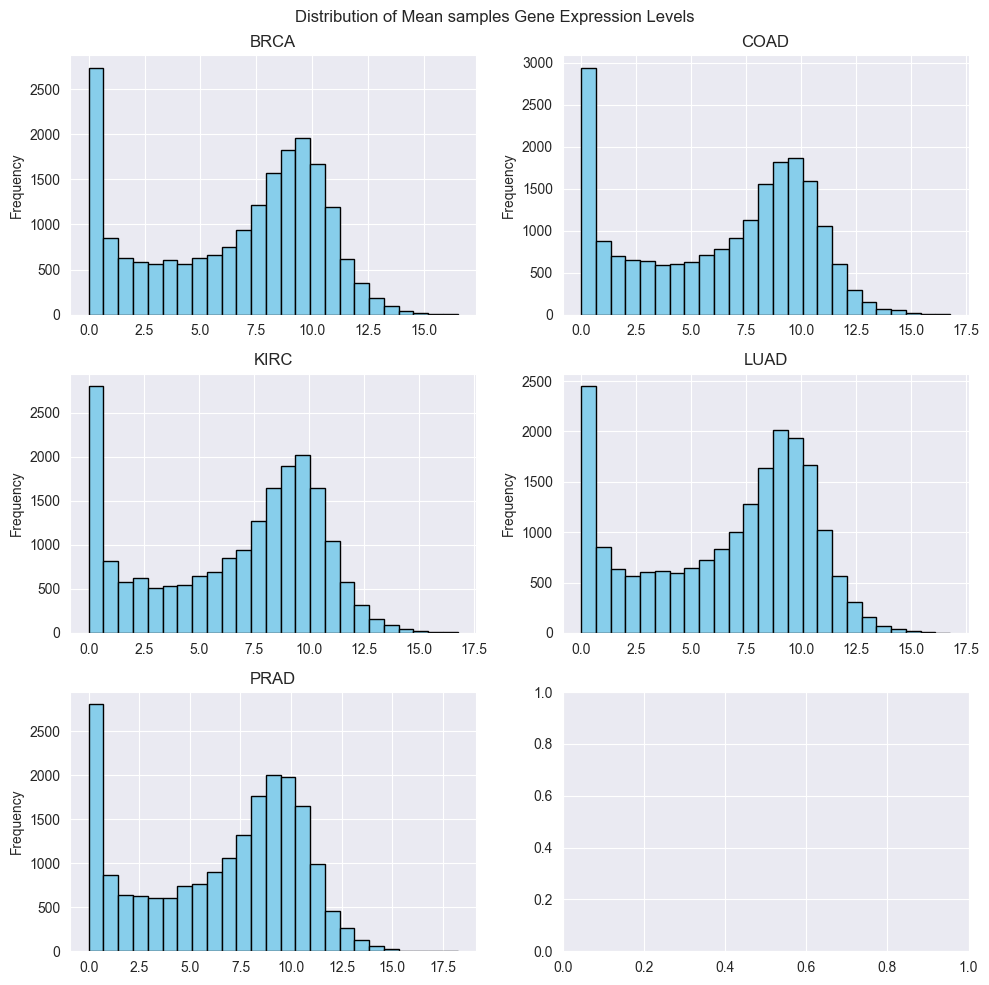

In [42]:
# We will use the mean of the all samples across the genes to see the distribution of the data across the classes
# We will make subplot of the histogram to see the distribution of the data across the classes

cancer_names = df_pivot.index.tolist()
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('Distribution of Mean samples Gene Expression Levels')
for i, ax in enumerate(cancer_names):
    df_pivot.loc[ax].plot(kind="hist", ax=axes[i//2, i%2], title=ax,color='skyblue', edgecolor='black',bins=25)    
plt.tight_layout()
plt.show()
    
#df_brca=df_pivot.loc["BRCA"]



In [43]:
# Let's compare to the square root and plot the distribution of the data across the classes
# I will apply a square root to all the dataset and plot again the histogram to see the distribution of the data across the classes
import numpy as np

df_square_root=np.sqrt(df_pivot)


""""For example, a common way to do this for positive features with a heavy tail to the right is to
replace the feature with its square root"""


'"For example, a common way to do this for positive features with a heavy tail to the right is to\nreplace the feature with its square root'

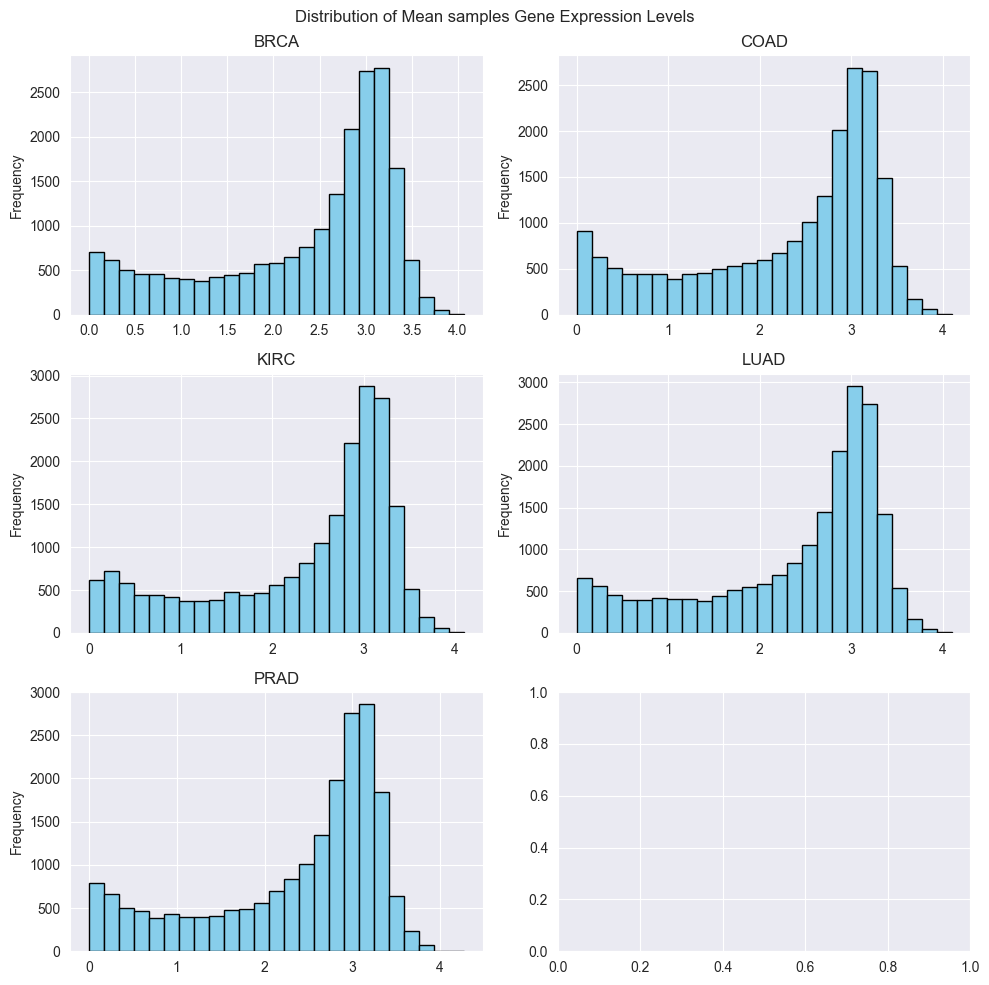

In [44]:
cancer_names = df_square_root.index.tolist()
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('Distribution of Mean samples Gene Expression Levels')
for i, ax in enumerate(cancer_names):
    df_square_root.loc[ax].plot(kind="hist", ax=axes[i//2, i%2], title=ax,color='skyblue', edgecolor='black',bins=25)
plt.tight_layout()
plt.show()

ValueError: Unsupported dtype object

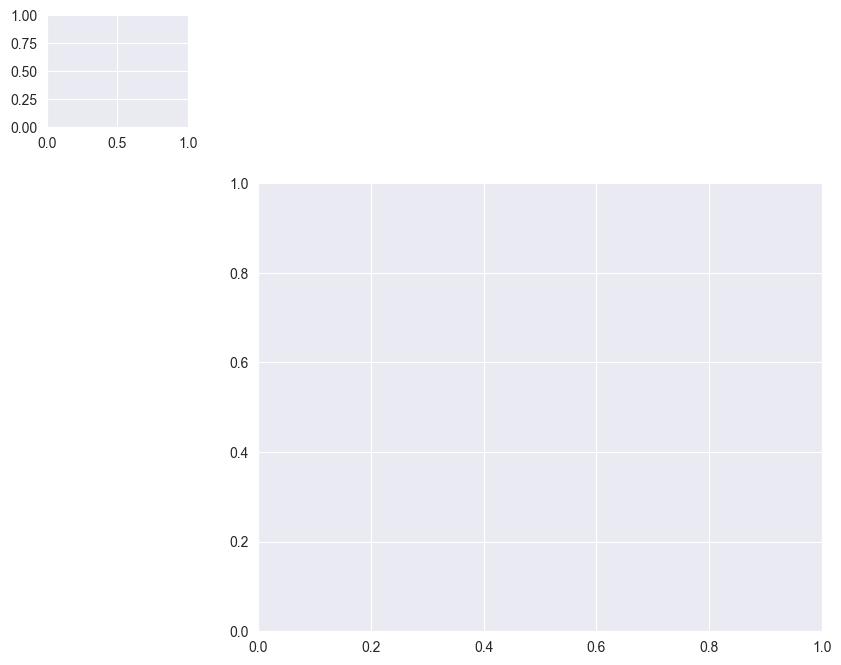

In [6]:
# Let´s perform a correlation matrix to see the relationship between the genes for each cancer

import seaborn as sns


sns.clustermap(df_merged, annot=True, center=0, figsize=(10, 8))

In [10]:
import dask.dataframe as dd

ddf=dd.from_pandas(df_merged,npartitions=4)


import seaborn as sns


sns.clustermap(df_merged, annot=True, center=0, figsize=(10, 8))

In [7]:
df_merged.head()

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [94]:
# Perform shapiro test to see if the data is normally distributed or not
from scipy.stats import shapiro

for i in range(5):
    stat, p = shapiro(df_square_root.iloc[i,:])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.864, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.872, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.860, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.863, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.864, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\pctes\AppData\Local\Temp\ipykernel_24088\1921051786.py:5: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20531.
  stat, p = shapiro(df_square_root.iloc[i,:])


In [17]:
# Let's scale the data before doing PCA

df_numerical=df_merged.iloc[:,1:]
scaler = StandardScaler()
scaled_data=scaler.fit_transform(df_numerical)

(801, 20531)

In [37]:
# Let's Perform PCA to dimension reduction and see the relationship between the genes
# We will use a  Scree plot to see the variance explained by the principal components

pca = PCA(n_components=15,svd_solver='full')
X_pca=pca.fit_transform(scaled_data)

print(pca.explained_variance_ratio_)


[0.10539781 0.08754232 0.07810081 0.05165647 0.04028932 0.02920881
 0.02354735 0.02145299 0.01632001 0.01233899 0.01054096 0.00894552
 0.00850433 0.00752984 0.00666611]


In [38]:
# pca.explained_variance_ provides the actual variance explained by each principal component, while pca.explained_variance_ratio_ provides the proportion of variance explained by each principal component relative to the total variance in the data. 

import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.10539781, 0.19294014, 0.27104095, 0.32269742, 0.36298674,
       0.39219555, 0.4157429 , 0.43719589, 0.4535159 , 0.4658549 ,
       0.47639585, 0.48534137, 0.4938457 , 0.50137554, 0.50804164])

In [39]:
pca.explained_variance_

array([2138.4510195 , 1776.17511467, 1584.61311767, 1048.07516639,
        817.44324014,  592.62724714,  477.75999283,  435.26681234,
        331.12214046,  250.3499398 ,  213.86892113,  181.49851978,
        172.54708679,  152.77539019,  135.25082944])

In [40]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Print cumulative variance explained
for i, variance in enumerate(cumulative_variance):
    print(f"Cumulative Variance explained by first {i+1} principal component(s): {variance:.4f}")

Cumulative Variance explained by first 1 principal component(s): 0.1054
Cumulative Variance explained by first 2 principal component(s): 0.1929
Cumulative Variance explained by first 3 principal component(s): 0.2710
Cumulative Variance explained by first 4 principal component(s): 0.3227
Cumulative Variance explained by first 5 principal component(s): 0.3630
Cumulative Variance explained by first 6 principal component(s): 0.3922
Cumulative Variance explained by first 7 principal component(s): 0.4157
Cumulative Variance explained by first 8 principal component(s): 0.4372
Cumulative Variance explained by first 9 principal component(s): 0.4535
Cumulative Variance explained by first 10 principal component(s): 0.4659
Cumulative Variance explained by first 11 principal component(s): 0.4764
Cumulative Variance explained by first 12 principal component(s): 0.4853
Cumulative Variance explained by first 13 principal component(s): 0.4938
Cumulative Variance explained by first 14 principal componen

In [57]:
explained_variance=pca.explained_variance_

components_to_keep=explained_variance>15
print("Components to keep based on eigenvalue criterion:", components_to_keep.sum())
print("Eigenvalue: ", explained_variance)
# 

Components to keep based on eigenvalue criterion: 182
Eigenvalue:  [2.13845102e+03 1.77617511e+03 1.58461312e+03 1.04807517e+03
 8.17443240e+02 5.92627247e+02 4.77759993e+02 4.35266812e+02
 3.31122140e+02 2.50349940e+02 2.13868921e+02 1.81498520e+02
 1.72547087e+02 1.52775390e+02 1.35250829e+02 1.31259710e+02
 1.23483814e+02 1.18704881e+02 1.07404796e+02 1.04589379e+02
 9.92673005e+01 9.45145277e+01 9.23160896e+01 9.08223582e+01
 8.62029773e+01 8.48374742e+01 8.16496506e+01 7.98602232e+01
 7.92096995e+01 7.27752763e+01 7.25511691e+01 7.10082131e+01
 6.84437270e+01 6.74666517e+01 6.58733966e+01 6.49512836e+01
 6.27388725e+01 5.98929272e+01 5.78299464e+01 5.68908854e+01
 5.62293057e+01 5.45671169e+01 5.39781462e+01 5.29635555e+01
 5.25214391e+01 5.18530327e+01 5.11778691e+01 5.05548832e+01
 4.94683049e+01 4.82602384e+01 4.74321832e+01 4.66014247e+01
 4.60119855e+01 4.56325620e+01 4.41225556e+01 4.36133693e+01
 4.32312139e+01 4.27619328e+01 4.15535334e+01 4.14391288e+01
 4.05497119e+01 4.

In [35]:
# Eigenvalue plot to see the variance explained by the principal components

plt.plot(range(1, 1001), explained_variance, marker='o', linestyle='--')

NameError: name 'explained_variance' is not defined

In [20]:
sum(explained_variance)

NameError: name 'explained_variance' is not defined

In [24]:
# Compute the distance matrix
# 2min and 52 seconds
transposed_data=scaled_data.T
#dist=pdist(transposed_data,metric="euclidean")

In [22]:
transposed_data=pd.DataFrame(transposed_data)

In [16]:
# Calculate the distances between the genes
distances=pdist(transposed_data,metric="euclidean")

# 1 min and 15 sec

In [17]:
from joblib import Parallel, delayed
def calculate_distances(data):
    return pdist(data, metric="euclidean")

parallel_results = Parallel(n_jobs=-1)(delayed(calculate_distances)(transposed_data) for _ in range(1))
# It took the same time using parallel computing as normal computing
# 1 min and 17 sec


In [28]:
# After we calculate the distances, we will convert the distances to a square matrix
dist_matrix=squareform(distances)
dist_matrix


#  Squareform/condensed saves memory by only representing the upper triangular points, whereas uncondensed is the full matrix.

# Remember that converting a condensed matrix to a square matrix can consume more memory, especially for large datasets, so use it judiciously based on your specific needs.

array([[ 0.        , 39.53952492, 39.47858548, ..., 40.99664959,
        39.18457393, 40.57686808],
       [39.53952492,  0.        , 27.32560202, ..., 34.70979034,
        41.35326638, 39.33159002],
       [39.47858548, 27.32560202,  0.        , ..., 38.66693573,
        39.78885513, 38.48223116],
       ...,
       [40.99664959, 34.70979034, 38.66693573, ...,  0.        ,
        38.89001177, 41.02593018],
       [39.18457393, 41.35326638, 39.78885513, ..., 38.89001177,
         0.        , 39.67206624],
       [40.57686808, 39.33159002, 38.48223116, ..., 41.02593018,
        39.67206624,  0.        ]])

In [46]:
# Now that we have the distance scaled matrix, we will use the hierarchical clustering to see the relationship between the genes



In [48]:
# This is the equivalent In R studio

# distances <- dist(t(data), method = "euclidean")
# Compute hierarchical clustering linkage matrix
#linkage_matrix <- hclust(distances, method = "ward.D2")
# Plot dendrogram
#plot(linkage_matrix, hang = -1, main = "Hierarchical Clustering Dendrogram")

['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']


In [ ]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="mean")

# this will make it possible to impute missing values not only on the training set, but
# also on the validation set, the test set, and any new data fed to the model.

# housing_num = housing.select_dtypes(include=[np.number])
# imputer.fit(housing_num)
# X = imputer.transform(housing_num)

# KNNImputer replaces each missing value with the mean of the k-nearest neighbors’
# values for that feature. The distance is based on all the available features.

In [ ]:
# To change the categorical variables to numerical 
#from sklearn.preprocessing import OrdinalEncoder
#ordinal_encoder = OrdinalEncoder()
# housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [57]:
# We will implement CLARA instead of K means to see the relationship between the variables

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


C:\Users\pctes\AppData\Local\Temp\ipykernel_20136\571717318.py:19: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(distance_square, method='average')


<Figure size 1000x600 with 0 Axes>

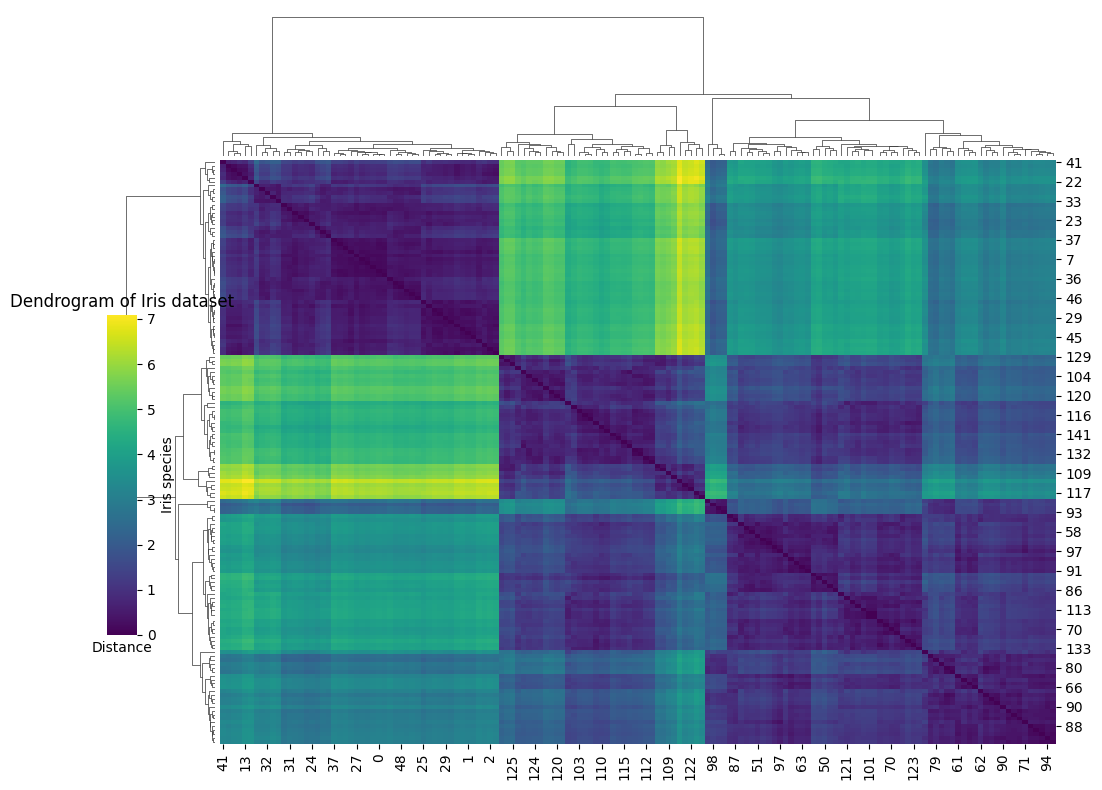

In [110]:

# We will implement CLARA instead of K means to see the relationship between the variables


